In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

In [2]:
place_name = 'Kamppi, Helsinki, Finland'
graph = ox.graph_from_place(place_name)
type(graph)

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


networkx.classes.multidigraph.MultiDiGraph

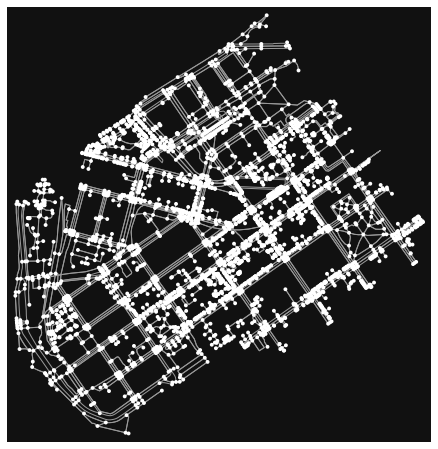

In [3]:
fig, ax = ox.plot_graph(graph)

In [4]:
m = ox.plot_graph_folium(graph)

In [5]:
m

### Graph to GeoDataFrame

In [6]:
nodes, edges = ox.graph_to_gdfs(graph)

In [7]:
nodes.head()

y          x  street_count   highway  ref  \
osmid                                                         
25216594  60.164794  24.921057             5       NaN  NaN   
25238874  60.163665  24.921028             4       NaN  NaN   
25238883  60.163452  24.921441             4  crossing  NaN   
25238933  60.161114  24.924529             3       NaN  NaN   
25238944  60.164631  24.921286             3       NaN  NaN   

                           geometry  
osmid                                
25216594  POINT (24.92106 60.16479)  
25238874  POINT (24.92103 60.16366)  
25238883  POINT (24.92144 60.16345)  
25238933  POINT (24.92453 60.16111)  
25238944  POINT (24.92129 60.16463)

In [8]:
edges.head()

osmid  oneway lanes            name   highway  \
u        v          key                                                      
25216594 1372425721 0     23717777    True     2   Porkkalankatu   primary   
         1372425714 0     23856784    True     2  Mechelininkatu   primary   
25238874 336192701  0     29977177    True     3  Mechelininkatu   primary   
         1519889266 0    930820886    True     1    Itämerenkatu  tertiary   
25238883 568147264  0     58077048    True     4  Mechelininkatu   primary   

                        maxspeed  length  \
u        v          key                    
25216594 1372425721 0         40  10.404   
         1372425714 0         40  40.885   
25238874 336192701  0         40   5.843   
         1519889266 0         30  10.879   
25238883 568147264  0         40  15.388   

                                                                  geometry  \
u        v          key                                                      
25216594 1372425721 0    LINESTRING (24.92106 60.16479, 24.92087 60.16479)   
         1372425714 0    LINESTRING (24.92106 60.16479, 24.92095 60.164...   
25238874 336192701  0    LINESTRING (24.92103 60.16366, 24.92104 60.16361)   
         1519889266 0    LINESTRING (24.92103 60.16366, 24.92083 60.16366)   
25238883 568147264  0    LINESTRING (24.92144 60.16345, 24.92140 60.16359)   

                        tunnel junction access bridge service  ref  
u        v          key                                             
25216594 1372425721 0      NaN      NaN    NaN    NaN     NaN  NaN  
         1372425714 0      NaN      NaN    NaN    NaN     NaN  NaN  
25238874 336192701  0      NaN      NaN    NaN    NaN     NaN  NaN  
         1519889266 0      NaN      NaN    NaN    NaN     NaN  NaN  
25238883 568147264  0      NaN      NaN    NaN    NaN     NaN  NaN

In [9]:
edges.reset_index(inplace=True)

In [10]:
edges.head()

u           v  key      osmid  oneway lanes            name  \
0  25216594  1372425721    0   23717777    True     2   Porkkalankatu   
1  25216594  1372425714    0   23856784    True     2  Mechelininkatu   
2  25238874   336192701    0   29977177    True     3  Mechelininkatu   
3  25238874  1519889266    0  930820886    True     1    Itämerenkatu   
4  25238883   568147264    0   58077048    True     4  Mechelininkatu   

    highway maxspeed  length  \
0   primary       40  10.404   
1   primary       40  40.885   
2   primary       40   5.843   
3  tertiary       30  10.879   
4   primary       40  15.388   

                                            geometry tunnel junction access  \
0  LINESTRING (24.92106 60.16479, 24.92087 60.16479)    NaN      NaN    NaN   
1  LINESTRING (24.92106 60.16479, 24.92095 60.164...    NaN      NaN    NaN   
2  LINESTRING (24.92103 60.16366, 24.92104 60.16361)    NaN      NaN    NaN   
3  LINESTRING (24.92103 60.16366, 24.92083 60.16366)    NaN      NaN    NaN   
4  LINESTRING (24.92144 60.16345, 24.92140 60.16359)    NaN      NaN    NaN   

  bridge service  ref  
0    NaN     NaN  NaN  
1    NaN     NaN  NaN  
2    NaN     NaN  NaN  
3    NaN     NaN  NaN  
4    NaN     NaN  NaN

#### Place polygon

In [11]:
area = ox.geocode_to_gdf(place_name)
area.head()

geometry  bbox_north  bbox_south  \
0  POLYGON ((24.92064 60.16483, 24.92069 60.16447...   60.172075   60.160469   

   bbox_east  bbox_west   place_id  osm_type  osm_id       lat        lon  \
0  24.943453  24.920642  282313415  relation  184714  60.16628  24.932083   

                                        display_name     class  \
0  Kamppi, Southern major district, Helsinki, Hel...  boundary   

             type  importance  
0  administrative    0.760313

<AxesSubplot:>

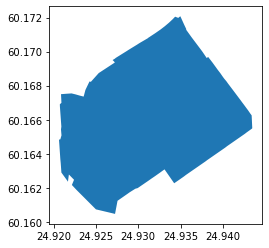

In [12]:
area.plot()

In [14]:
tags = {
    'building': True
}

buildings = ox.geometries_from_place(place_name, tags)
buildings.head()

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linest

amenity          operator wheelchair  \
element_type osmid                                           
way          8035238      NaN               NaN        NaN   
             8042297      NaN               NaN        NaN   
             14797170     NaN  City of Helsinki        NaN   
             14797171     NaN               NaN        NaN   
             14797172     NaN               NaN        NaN   

                                                                geometry  \
element_type osmid                                                         
way          8035238   POLYGON ((24.93563 60.17045, 24.93557 60.17054...   
             8042297   POLYGON ((24.92938 60.16795, 24.92933 60.16797...   
             14797170  POLYGON ((24.92427 60.16648, 24.92427 60.16650...   
             14797171  POLYGON ((24.92390 60.16729, 24.92391 60.16731...   
             14797172  POLYGON ((24.92647 60.16689, 24.92648 60.16689...   

                       source access addr:housenumber      addr:street  \
element_type osmid                                                       
way          8035238      NaN    NaN            22-24  Mannerheimintie   
             8042297      NaN    NaN                2   Runeberginkatu   
             14797170  survey    NaN               10  Lapinlahdenkatu   
             14797171  survey    NaN              NaN              NaN   
             14797172  survey    NaN              NaN              NaN   

                      addr:unit  ref  ... lippakioski takeaway  \
element_type osmid                    ...                        
way          8035238        NaN  NaN  ...         NaN      NaN   
             8042297        NaN  NaN  ...         NaN      NaN   
             14797170       NaN  NaN  ...         NaN      NaN   
             14797171       NaN  NaN  ...         NaN      NaN   
             14797172       NaN  NaN  ...         NaN      NaN   

                      outdoor_seating addr:floor covered area ways type  \
element_type osmid                                                        
way          8035238              NaN        NaN     NaN  NaN  NaN  NaN   
             8042297              NaN        NaN     NaN  NaN  NaN  NaN   
             14797170             NaN        NaN     NaN  NaN  NaN  NaN   
             14797171             NaN        NaN     NaN  NaN  NaN  NaN   
             14797172             NaN        NaN     NaN  NaN  NaN  NaN   

                      electrified nohousenumber  
element_type osmid                               
way          8035238          NaN           NaN  
             8042297          NaN           NaN  
             14797170         NaN           NaN  
             14797171         NaN           NaN  
             14797172         NaN           NaN  

[5 rows x 100 columns]

In [16]:
buildings.reset_index(inplace=True)

In [17]:
buildings.head()

element_type     osmid amenity          operator wheelchair  \
0          way   8035238     NaN               NaN        NaN   
1          way   8042297     NaN               NaN        NaN   
2          way  14797170     NaN  City of Helsinki        NaN   
3          way  14797171     NaN               NaN        NaN   
4          way  14797172     NaN               NaN        NaN   

                                            geometry  source access  \
0  POLYGON ((24.93563 60.17045, 24.93557 60.17054...     NaN    NaN   
1  POLYGON ((24.92938 60.16795, 24.92933 60.16797...     NaN    NaN   
2  POLYGON ((24.92427 60.16648, 24.92427 60.16650...  survey    NaN   
3  POLYGON ((24.92390 60.16729, 24.92391 60.16731...  survey    NaN   
4  POLYGON ((24.92647 60.16689, 24.92648 60.16689...  survey    NaN   

  addr:housenumber      addr:street  ... lippakioski takeaway outdoor_seating  \
0            22-24  Mannerheimintie  ...         NaN      NaN             NaN   
1                2   Runeberginkatu  ...         NaN      NaN             NaN   
2               10  Lapinlahdenkatu  ...         NaN      NaN             NaN   
3              NaN              NaN  ...         NaN      NaN             NaN   
4              NaN              NaN  ...         NaN      NaN             NaN   

  addr:floor covered area ways type electrified nohousenumber  
0        NaN     NaN  NaN  NaN  NaN         NaN           NaN  
1        NaN     NaN  NaN  NaN  NaN         NaN           NaN  
2        NaN     NaN  NaN  NaN  NaN         NaN           NaN  
3        NaN     NaN  NaN  NaN  NaN         NaN           NaN  
4        NaN     NaN  NaN  NaN  NaN         NaN           NaN  

[5 rows x 102 columns]

In [21]:
buildings.columns.to_list()

['element_type',
 'osmid',
 'amenity',
 'operator',
 'wheelchair',
 'geometry',
 'source',
 'access',
 'addr:housenumber',
 'addr:street',
 'addr:unit',
 'ref',
 'name',
 'addr:city',
 'addr:postcode',
 'height',
 'opening_hours',
 'fixme',
 'note',
 'addr:country',
 'ele',
 'phone',
 'smoking',
 'website',
 'tourism',
 'shop',
 'nodes',
 'building',
 'building:levels',
 'name:fi',
 'name:ko',
 'name:sv',
 'roof:levels',
 'roof:shape',
 'start_date',
 'url',
 'wikidata',
 'wikipedia',
 'bar',
 'brand',
 'brand:wikidata',
 'brand:wikipedia',
 'email',
 'fax',
 'internet_access',
 'internet_access:fee',
 'architect',
 'landuse',
 'suojelumerkintä',
 'layer',
 'last_full_renovation',
 'building:maintenance:operator',
 'building:material',
 'roof:material',
 'owner',
 'levels',
 'old_name',
 'omistusasuntoja',
 'building:colour',
 'roof:colour',
 'alt_name',
 'short_name',
 'was:building',
 'was:guard:operator',
 'building:min_level',
 'cuisine',
 'diet:halal',
 'diet:kosher',
 'historic',

In [24]:
buildings['unique_id'] = buildings.apply(lambda x: f'{x["element_type"]}/{x["osmid"]}' , axis=1)
buildings.head()

element_type     osmid amenity          operator wheelchair  \
0          way   8035238     NaN               NaN        NaN   
1          way   8042297     NaN               NaN        NaN   
2          way  14797170     NaN  City of Helsinki        NaN   
3          way  14797171     NaN               NaN        NaN   
4          way  14797172     NaN               NaN        NaN   

                                            geometry  source access  \
0  POLYGON ((24.93563 60.17045, 24.93557 60.17054...     NaN    NaN   
1  POLYGON ((24.92938 60.16795, 24.92933 60.16797...     NaN    NaN   
2  POLYGON ((24.92427 60.16648, 24.92427 60.16650...  survey    NaN   
3  POLYGON ((24.92390 60.16729, 24.92391 60.16731...  survey    NaN   
4  POLYGON ((24.92647 60.16689, 24.92648 60.16689...  survey    NaN   

  addr:housenumber      addr:street  ... takeaway outdoor_seating addr:floor  \
0            22-24  Mannerheimintie  ...      NaN             NaN        NaN   
1                2   Runeberginkatu  ...      NaN             NaN        NaN   
2               10  Lapinlahdenkatu  ...      NaN             NaN        NaN   
3              NaN              NaN  ...      NaN             NaN        NaN   
4              NaN              NaN  ...      NaN             NaN        NaN   

  covered area ways type electrified nohousenumber     unique_id  
0     NaN  NaN  NaN  NaN         NaN           NaN   way/8035238  
1     NaN  NaN  NaN  NaN         NaN           NaN   way/8042297  
2     NaN  NaN  NaN  NaN         NaN           NaN  way/14797170  
3     NaN  NaN  NaN  NaN         NaN           NaN  way/14797171  
4     NaN  NaN  NaN  NaN         NaN           NaN  way/14797172  

[5 rows x 103 columns]

In [25]:
buildings.columns

Index(['element_type', 'osmid', 'amenity', 'operator', 'wheelchair',
       'geometry', 'source', 'access', 'addr:housenumber', 'addr:street',
       ...
       'takeaway', 'outdoor_seating', 'addr:floor', 'covered', 'area', 'ways',
       'type', 'electrified', 'nohousenumber', 'unique_id'],
      dtype='object', length=103)

#### Points of Interest

In [26]:
tags = {'amenity': 'restaurant'}
restaurants = ox.geometries_from_place(place_name, tags)
len(restaurants)

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


167

In [27]:
restaurants.columns.values

array(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'amenity', 'cuisine', 'diet:halal', 'diet:kosher',
       'name', 'phone', 'website', 'wheelchair', 'geometry',
       'toilets:wheelchair', 'opening_hours', 'delivery:covid19',
       'opening_hours:covid19', 'takeaway:covid19', 'diet:vegetarian',
       'name:fi', 'name:zh', 'short_name', 'description', 'diet:vegan',
       'contact:phone', 'contact:website', 'source', 'outdoor_seating',
       'check_date:opening_hours', 'addr:housename', 'email', 'level',
       'address', 'access:covid19', 'drive_through:covid19', 'takeaway',
       'delivery', 'url', 'brunch', 'lunch:menu', 'reservation', 'room',
       'opening_hours:brunch', 'toilets', 'capacity', 'smoking',
       'access:dog', 'operator', 'shop', 'alt_name', 'contact:email',
       'established', 'name:sv', 'brand', 'brand:wikidata',
       'brand:wikipedia', 'floor', 'name:en', 'description:en',
       'old_name', 'highchair', 'lun

In [30]:
cols_selection = ['name', 'opening_hours', 'addr:city', 'addr:country',
                 'addr:housenumber', 'addr:postcode', 'addr:street']
restaurants[cols_selection].head()

name  \
element_type osmid                           
node         60062502               Kabuki   
             62965963         Empire Plaza   
             76617692         Johan Ludvig   
             76624339  Ravintola Rivoletto   
             76624351               Pueblo   

                                                           opening_hours  \
element_type osmid                                                         
node         60062502                                                NaN   
             62965963                                                NaN   
             76617692                                                NaN   
             76624339  Mo-Th 11:00-23:00; Fr 11:00-24:00; Sa 15:00-24...   
             76624351                                                NaN   

                      addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                            
node         60062502  Helsinki           FI               12         00180   
             62965963       NaN          NaN              NaN           NaN   
             76617692  Helsinki           FI              NaN           NaN   
             76624339  Helsinki           FI               38         00120   
             76624351  Helsinki           FI              NaN           NaN   

                           addr:street  
element_type osmid                      
node         60062502  Lapinlahdenkatu  
             62965963              NaN  
             76617692              NaN  
             76624339     Albertinkatu  
             76624351      Eerikinkatu

#### Plotting the data

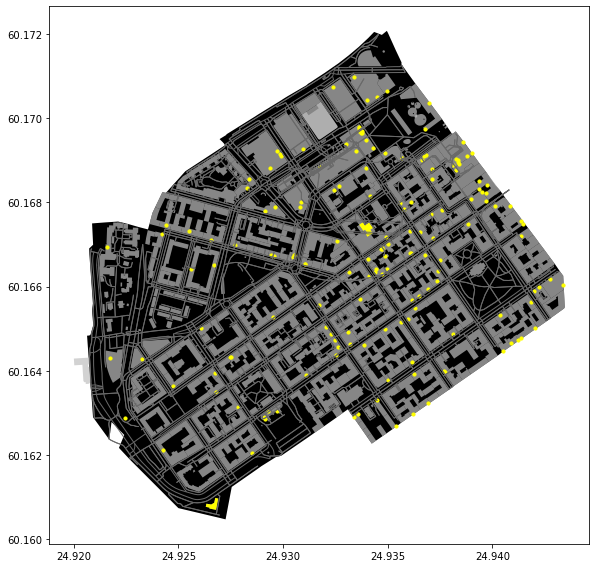

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
area.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, edgecolor='dimgray', lw=1)
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)
restaurants.plot(ax=ax, color='yellow', markersize=10)
plt.tight_layout()

#### Parks

In [39]:
tags = {
    'leisure': 'park',
    'landuse': 'grass'
}

parks = ox.geometries_from_place(place_name, tags)
print(f'Retrieved {len(parks)} objects.')

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Retrieved 55 objects.


In [40]:
parks.head()

geometry  \
element_type osmid                                                         
way          8042256   POLYGON ((24.93566 60.17132, 24.93566 60.17130...   
             8042613   POLYGON ((24.93701 60.16947, 24.93627 60.16919...   
             15218362  POLYGON ((24.92330 60.16499, 24.92323 60.16500...   
             15218739  POLYGON ((24.92741 60.16575, 24.92741 60.16574...   
             15223911  POLYGON ((24.93126 60.16589, 24.93077 60.16624...   

                      access  source addr:city  \
element_type osmid                               
way          8042256     NaN     NaN       NaN   
             8042613     NaN     NaN       NaN   
             15218362    NaN  survey       NaN   
             15218739    NaN     NaN       NaN   
             15223911    NaN     NaN       NaN   

                                                                   nodes  \
element_type osmid                                                         
way          8042256   [292719496, 1001543836, 1037987967, 1001544060...   
             8042613   [552965718, 293390264, 295056669, 256264975, 1...   
             15218362  [144181223, 150532964, 150532958, 150532966, 1...   
             15218739  [1876856069, 1876856056, 1876856052, 187685606...   
             15223911  [1008235303, 1008235126, 1008235240, 100823522...   

                      leisure                   name                name:fi  \
element_type osmid                                                            
way          8042256     park                    NaN                    NaN   
             8042613     park         Simonpuistikko         Simonpuistikko   
             15218362    park     Työmiehenpuistikko     Työmiehenpuistikko   
             15218739    park            Lastenlehto            Lastenlehto   
             15223911    park  Lapinlahden puistikko  Lapinlahden puistikko   

                               name:sv hoitoluokitus_viheralue   wikidata  \
element_type osmid                                                          
way          8042256               NaN                     NaN        NaN   
             8042613     Simonsskvären                     NaN        NaN   
             15218362    Arbetarparken                      A2        NaN   
             15218739      Barnslunden                      A2  Q18660505   
             15223911  Lappviksskvären                      A2        NaN   

                            wikipedia landuse alt_name loc_name  
element_type osmid                                               
way          8042256              NaN     NaN      NaN      NaN  
             8042613              NaN     NaN      NaN      NaN  
             15218362             NaN     NaN      NaN      NaN  
             15218739  fi:Lastenlehto     NaN      NaN      NaN  
             15223911             NaN     NaN      NaN      NaN

<AxesSubplot:>

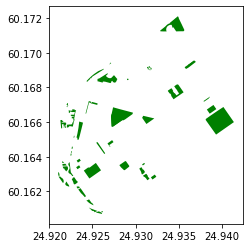

In [41]:
parks.plot(color='green')

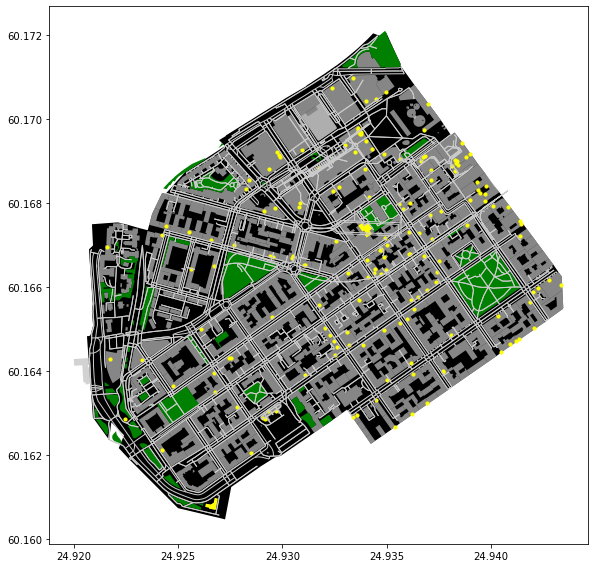

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))
area.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, edgecolor='#cccccc', lw=1)
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)
restaurants.plot(ax=ax, color='yellow', markersize=10)
parks.plot(ax=ax, color='green')
plt.tight_layout()